In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Esq_df_Nora = pd.read_csv('E_squares.csv', index_col=0)

In [30]:
E_df = pd.read_csv('E_framecoeff1_mil.csv', index_col=0)
E_df

,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(10, 1)","(10, 2)","(10, 3)","(10, 4)","(10, 5)","(10, 6)","(10, 7)","(10, 8)","(10, 9)","(10, 10)"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-3,2,2,-3,2,-3,2,2,-3,2,...,0,0,0,0,0,0,0,0,0,0
7,3,-1,2,-2,1,-3,0,3,-1,2,...,-4,-1,2,-2,1,4,0,-4,-1,2
11,-2,-4,-6,3,1,-1,-3,6,4,2,...,2,4,-5,-3,-1,1,3,5,-4,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999953,-1140,-1502,-337,-764,-682,1002,-1245,-1050,-313,-286,...,1773,-1686,-339,1344,-905,-1411,-500,-301,-618,-390
999959,-108,-1080,874,1116,602,-598,982,-1302,1240,1136,...,103,-840,-315,293,1768,-185,-77,912,-1209,1236
999961,-1035,1610,1702,1105,-297,1013,1339,-285,484,1030,...,-990,168,70,-295,1556,46,-186,1414,468,-1160
999979,1110,68,946,1396,-1721,883,1276,1829,494,1454,...,498,-722,-8,84,1384,811,-1034,146,-182,21


In [31]:
primes = np.array(E_df.index, dtype=np.int32) # List of primes from index.
primes

array([     2,      3,      5, ..., 999961, 999979, 999983], dtype=int32)

In [32]:
squares_under = np.floor(np.sqrt(primes)).astype(np.int32)**2 # Nearest square under p
squares_over = np.ceil(np.sqrt(primes)).astype(np.int32)**2 # Nearest square over p.

In [34]:
EN_df = E_df.apply(lambda col : primes + 1 - col) # N = (p+1) - a_p
EN_df

,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(10, 1)","(10, 2)","(10, 3)","(10, 4)","(10, 5)","(10, 6)","(10, 7)","(10, 8)","(10, 9)","(10, 10)"
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,9,4,4,9,4,9,4,4,9,4,...,6,6,6,6,6,6,6,6,6,6
7,5,9,6,10,7,11,8,5,9,6,...,12,9,6,10,7,4,8,12,9,6
11,14,16,18,9,11,13,15,6,8,10,...,10,8,17,15,13,11,9,7,16,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999953,1001094,1001456,1000291,1000718,1000636,998952,1001199,1001004,1000267,1000240,...,998181,1001640,1000293,998610,1000859,1001365,1000454,1000255,1000572,1000344
999959,1000068,1001040,999086,998844,999358,1000558,998978,1001262,998720,998824,...,999857,1000800,1000275,999667,998192,1000145,1000037,999048,1001169,998724
999961,1000997,998352,998260,998857,1000259,998949,998623,1000247,999478,998932,...,1000952,999794,999892,1000257,998406,999916,1000148,998548,999494,1001122
999979,998870,999912,999034,998584,1001701,999097,998704,998151,999486,998526,...,999482,1000702,999988,999896,998596,999169,1001014,999834,1000162,999959


In [35]:
Esq_df = EN_df.apply(lambda col : (col == squares_under) | (col == squares_over)) # Is N = square above or below?
Esq_df

,"(1, 1)","(1, 2)","(1, 3)","(1, 4)","(1, 5)","(1, 6)","(1, 7)","(1, 8)","(1, 9)","(1, 10)",...,"(10, 1)","(10, 2)","(10, 3)","(10, 4)","(10, 5)","(10, 6)","(10, 7)","(10, 8)","(10, 9)","(10, 10)"
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
11,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999953,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999979,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
Esq_df.sum()

(1, 1)      100
(1, 2)      243
(1, 3)      124
(1, 4)      125
(1, 5)      126
           ... 
(10, 6)     126
(10, 7)     114
(10, 8)     128
(10, 9)     126
(10, 10)    114
Length: 100, dtype: int64

In [37]:
Esq_df_Nora.sum()

(1, 1)      100
(1, 2)      243
(1, 3)      124
(1, 4)      125
(1, 5)      126
           ... 
(10, 6)     126
(10, 7)     114
(10, 8)     128
(10, 9)     126
(10, 10)    114
Length: 100, dtype: int64

In [41]:
(Esq_df != Esq_df_Nora).values.sum() # Do my values ever differ from Nora's?

0

In [42]:
numsq = Esq_df.sum()
numsq

(1, 1)      100
(1, 2)      243
(1, 3)      124
(1, 4)      125
(1, 5)      126
           ... 
(10, 6)     126
(10, 7)     114
(10, 8)     128
(10, 9)     126
(10, 10)    114
Length: 100, dtype: int64

In [43]:
numsq.sort_values()

(9, 9)     97
(5, 2)     99
(1, 1)    100
(7, 2)    100
(5, 9)    101
         ... 
(3, 4)    166
(8, 9)    179
(2, 3)    182
(1, 2)    243
(6, 7)    372
Length: 100, dtype: int64

In [47]:
Landau_list = pd.Series((primes - 1) == squares_under, index=primes)
Landau_list # Which primes are x^2 + 1?

2          True
3         False
5          True
7         False
11        False
          ...  
999953    False
999959    False
999961    False
999979    False
999983    False
Length: 78498, dtype: bool

In [48]:
Landau_list.sum()

112

In [50]:
numsq.mean() # A bit higher than Landau_list.  But thrown off for a reason?

126.58

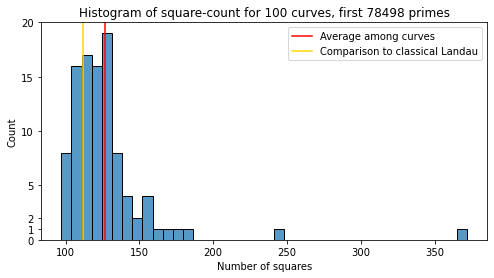

In [57]:
fig,ax = plt.subplots(1,1,figsize=(8,4))
sns.histplot(numsq, ax=ax, bins=40)
ax.axvline(numsq.mean(), color='red', label='Average among curves')
ax.axvline(Landau_list.sum(), color='gold', label='Comparison to classical Landau')
ax.set_xlabel('Number of squares')
ax.set_title('Histogram of square-count for {} curves, first {} primes'.format(EN_df.shape[1], EN_df.shape[0]))
ax.set_yticks([0,1,2,5,10,15,20])
plt.legend()
plt.show()

In [76]:
curve_counts = np.cumsum(Esq_df)

In [68]:
Land_cumulative = np.cumsum(Landau_list)
Land_cumulative

2           1
3           1
5           2
7           2
11          2
         ... 
999953    112
999959    112
999961    112
999979    112
999983    112
Length: 78498, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

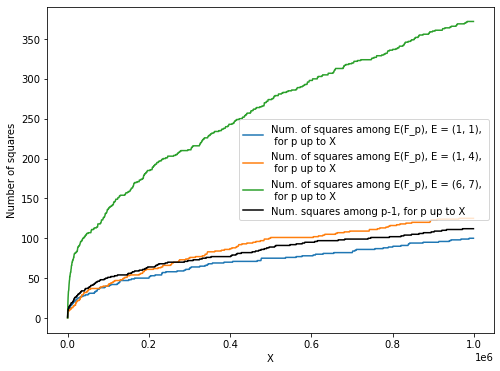

In [79]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
for curve in ['(1, 1)', '(1, 4)', '(6, 7)']:  # Three curves.
    label = 'Num. of squares among E(F_p), E = {}, \n for p up to X'.format(curve)
    sns.lineplot(primes[::50], curve_counts[curve].values[::50], label=label,)
sns.lineplot(primes[::50], Land_cumulative.values[::50], label='Num. squares among p-1, for p up to X', 
             color='black')
ax.set_xlabel('X')
ax.set_ylabel('Number of squares')
plt.show()

In [65]:
curve_count

2           0
3           1
5           2
7           2
11          3
         ... 
999953    125
999959    125
999961    125
999979    125
999983    125
Name: (1, 4), Length: 78498, dtype: int64